In [1]:
import jax
import os
import jax.numpy as jnp
import ptyrodactyl.electrons as pte

In [2]:
jax.config.update("jax_enable_x64", True)

In [3]:
jax.devices()

[CudaDevice(id=0),
 CudaDevice(id=1),
 CudaDevice(id=2),
 CudaDevice(id=3),
 CudaDevice(id=4),
 CudaDevice(id=5),
 CudaDevice(id=6),
 CudaDevice(id=7)]

In [4]:
mos2_gb = pte.parse_xyz("../../data/mos2_234atoms_GB.xyz")

In [5]:
len(mos2_gb.atomic_numbers)

234

In [6]:
pixel_size = 0.2  # Angstroms
mos2_potentials = pte.kirkland_potentials_XYZ(mos2_gb, pixel_size)

ConcretizationTypeError: Abstract tracer value encountered where concrete value is expected: traced array with shape int32[]
It arose in the jnp.arange argument 'stop'
The error occurred while tracing the function single_atom_potential at /home/qz7/ptyrodactyl/src/ptyrodactyl/electrons/atom_potentials.py:314 for jit. This value became a tracer due to JAX operations on these lines:

  operation a:i32[] = convert_element_type[new_dtype=int32 weak_type=False] b
    from line /home/qz7/ptyrodactyl/src/ptyrodactyl/electrons/atom_potentials.py:416:38 (single_atom_potential)

See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.ConcretizationTypeError

In [ ]:
pte.kirkland_potentials_XYZ

In [ ]:
pixel_size = 0.1  # Angstroms
element_IDS = set(atoms[:, 0])
kirkland_potentials = {}
for element_ID in element_IDS:
    potential = atomic_potential(
        atom_no=int(element_ID),
        pixel_size=pixel_size,
        sampling=16,
        potential_extent=4,
        datafile="C:/users/zwx/Downloads/Kirkland_Potentials.npy",
    )
    kirkland_potentials[int(element_ID)] = potential


kirkland_jax = jnp.asarray([kirkland_potentials[int(el)] for el in element_IDS])
for ei, element_ID in enumerate(element_IDS):
    atoms[atoms[:, 0] == element_ID, 0] = ei

finalsize [80 80]
sspot.shape (1280, 1280)
finalsize [80 80]
sspot.shape (1280, 1280)


The first time you run this, it will be slow due to compilation. But it should be much faster if you run this repeatedly.

In [3]:
poss = [
    [0, 0],
    [-5, 5],
    [5, 5],
]  # these are all in Angstroms, assuming center of the potential slice is at (0,0). if you don't specify poss, it will default to [[0,0]]. (single Cbed at the center)

cbed_patterns, slices, test_rotated_coords, test_rotated_cells = overall_wrapper(
    atoms,
    metadata,
    zone_hkl=jnp.array([1, 0, 1]),
    theta=jnp.pi / 4,
    pixel_size=0.1,
    kirkland_jax=kirkland_jax,
    poss=poss,
)

Time taken for preprocessing: 11.199968576431274 seconds
time taken for cbed calculation: 2.1150424480438232 seconds


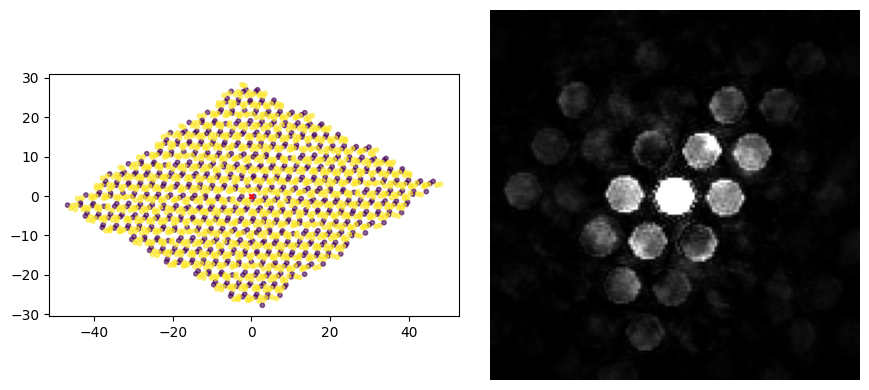

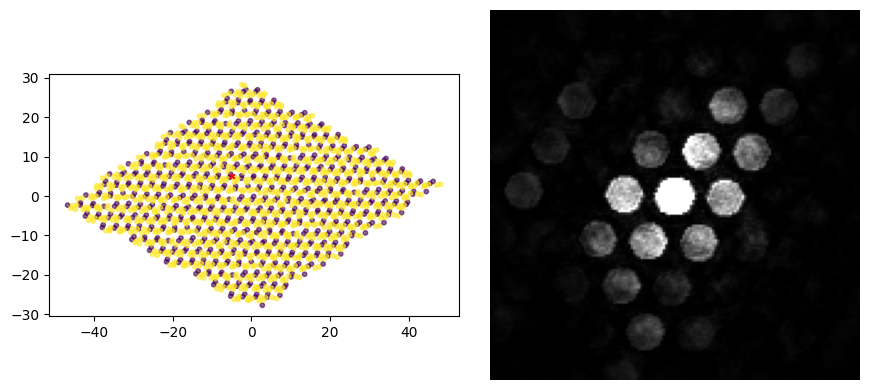

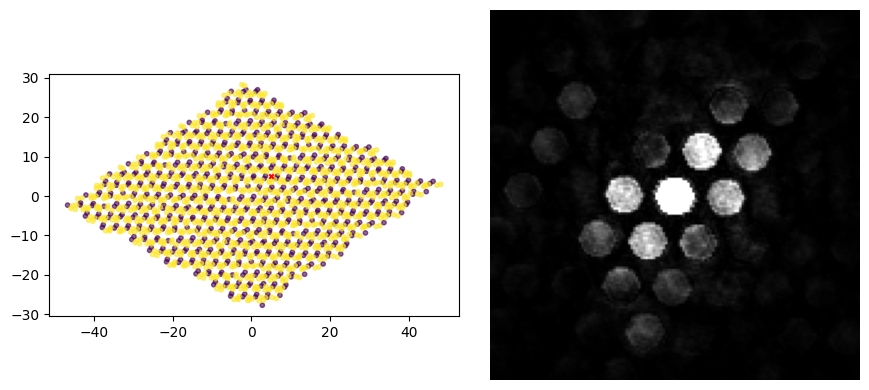

In [4]:
import matplotlib.pyplot as plt

for ci, cbed_pattern in enumerate(cbed_patterns.data_array):
    # print(cbed_pattern.data_array.shape)
    fig, axs = plt.subplots(1, 2, figsize=(9, 4))
    array_center = [cbed_pattern.shape[0] // 2, cbed_pattern.shape[1] // 2]
    # axs[si,1].imshow(np.log10(cbed_pattern.data_array[array_center[0]-50:array_center[1]+50, array_center[0]-50:array_center[1]+50]), cmap='gray')
    # axs[si,1].imshow(cbed_pattern.data_array, cmap='gray')

    axs[0].scatter(
        test_rotated_coords[:, 1],
        test_rotated_coords[:, 2],
        c=test_rotated_coords[:, 0],
        cmap="viridis",
        s=10,
        alpha=0.6,
    )
    axs[0].set_aspect("equal")
    axs[0].scatter(
        poss[ci][0], poss[ci][1], c="red", s=10, marker="x", label="Probe Position"
    )
    axs[1].imshow(
        contrast_stretch(
            cbed_pattern[
                array_center[0] - 75 : array_center[0] + 75,
                array_center[1] - 75 : array_center[1] + 75,
            ],
            2,
            99,
        ),
        cmap="gray",
    )
    axs[1].set_axis_off()
    plt.tight_layout()

Time taken for preprocessing: 5.168100357055664 seconds
time taken for cbed calculation: 1.3638195991516113 seconds
Time taken for preprocessing: 3.2881100177764893 seconds
time taken for cbed calculation: 1.2847914695739746 seconds
Time taken for preprocessing: 5.099476099014282 seconds
time taken for cbed calculation: 0.8783409595489502 seconds
Time taken for preprocessing: 6.157881498336792 seconds
time taken for cbed calculation: 1.0642914772033691 seconds
Time taken for preprocessing: 5.416759729385376 seconds
time taken for cbed calculation: 1.0349621772766113 seconds
Time taken for preprocessing: 4.157429218292236 seconds
time taken for cbed calculation: 0.988255500793457 seconds
Time taken for preprocessing: 4.483587980270386 seconds
time taken for cbed calculation: 0.8922388553619385 seconds


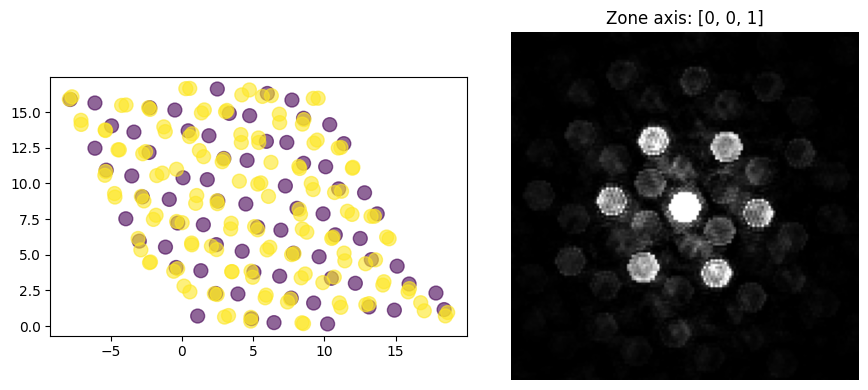

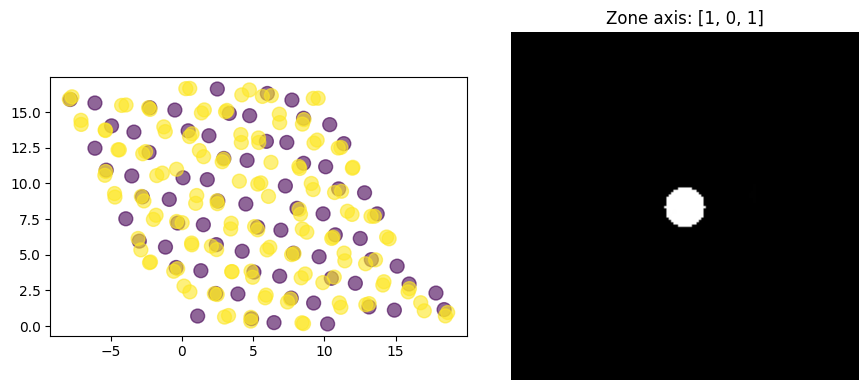

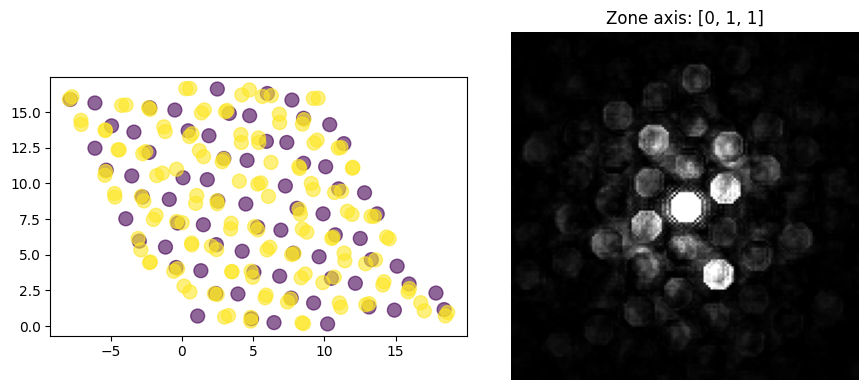

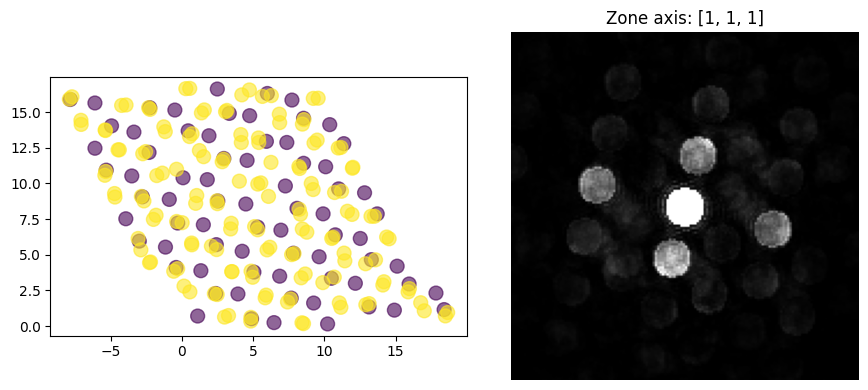

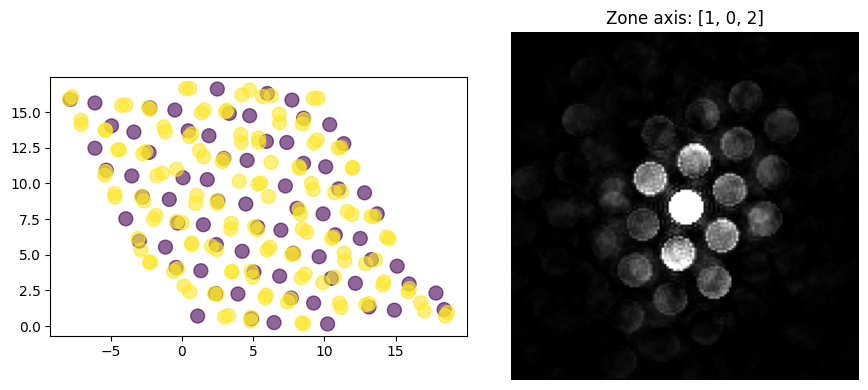

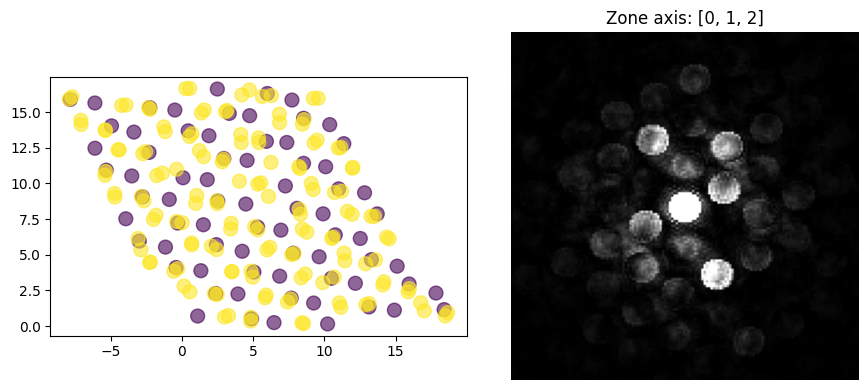

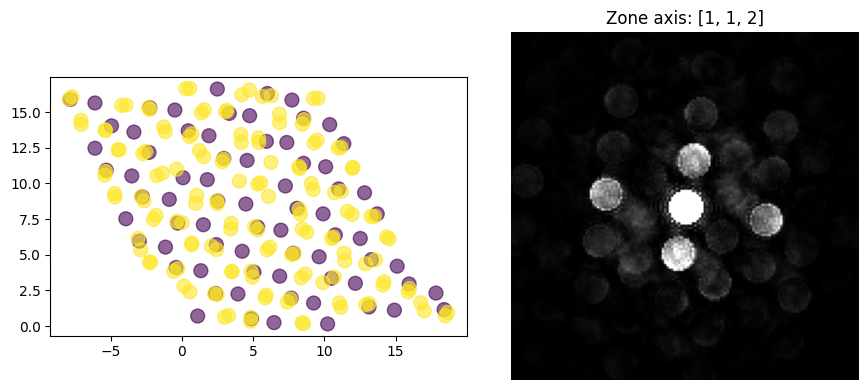

In [5]:
for zone_hkl in [
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1],
    [1, 0, 2],
    [0, 1, 2],
    [1, 1, 2],
]:
    cbed_patterns, slices, test_rotated_coords, test_rotated_cells = overall_wrapper(
        atoms,
        metadata,
        zone_hkl=jnp.array(zone_hkl),
        theta=0,
        pixel_size=0.1,
        kirkland_jax=kirkland_jax,
    )
    for cbed_pattern in cbed_patterns.data_array:
        fig, axs = plt.subplots(1, 2, figsize=(9, 4))
        array_center = [cbed_pattern.shape[0] // 2, cbed_pattern.shape[1] // 2]
        axs[0].scatter(
            atoms[:, 1], atoms[:, 2], c=atoms[:, 0], cmap="viridis", s=100, alpha=0.6
        )
        axs[0].set_aspect("equal")
        axs[1].imshow(
            contrast_stretch(
                cbed_pattern[
                    array_center[0] - 75 : array_center[0] + 75,
                    array_center[1] - 75 : array_center[1] + 75,
                ],
                2,
                99,
            ),
            cmap="gray",
        )
        axs[1].set_axis_off()
        axs[1].set_title(f"Zone axis: {zone_hkl}")
        plt.tight_layout()